In [50]:
import re
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics 

In [10]:
list_link = []
a = 1
for page in range(1, 21):
    page_url = "https://www.transfermarkt.com/spieler-statistik/wertvollstespieler/marktwertetop?land_id=0&ausrichtung=alle&spielerposition_id=alle&altersklasse=alle&jahrgang=0&kontinent_id=0&fbclid=IwZXh0bgNhZW0CMTAAAR0-voJMuML3PKoXuYNo3teFk7euZAgOdzeNMFvV0tSBDwHAMrNcIMT8l-g_aem_yYgThqH-wAcTmBPFvX5TWQ&page=" + str(page)
    
    driver = webdriver.Chrome()

    driver.get(page_url)
    
    page_source = driver.page_source

    pattern = r'href="[^"]*/profil/spieler/[^"]*"'
    links = re.findall(pattern, page_source)

    for link in links:
        list_link.append(link)
    print(f"page = {a}")
    a+=1

page = 1
page = 2
page = 3
page = 4
page = 5
page = 6
page = 7
page = 8
page = 9
page = 10
page = 11
page = 12
page = 13
page = 14
page = 15
page = 16
page = 17
page = 18
page = 19
page = 20


In [11]:
list_link

['href="/jude-bellingham/profil/spieler/581678"',
 'href="/erling-haaland/profil/spieler/418560"',
 'href="/vinicius-junior/profil/spieler/371998"',
 'href="/kylian-mbappe/profil/spieler/342229"',
 'href="/phil-foden/profil/spieler/406635"',
 'href="/bukayo-saka/profil/spieler/433177"',
 'href="/florian-wirtz/profil/spieler/598577"',
 'href="/jamal-musiala/profil/spieler/580195"',
 'href="/rodri/profil/spieler/357565"',
 'href="/lamine-yamal/profil/spieler/937958"',
 'href="/federico-valverde/profil/spieler/369081"',
 'href="/declan-rice/profil/spieler/357662"',
 'href="/rodrygo/profil/spieler/412363"',
 'href="/lautaro-martinez/profil/spieler/406625"',
 'href="/martin-odegaard/profil/spieler/316264"',
 'href="/eduardo-camavinga/profil/spieler/640428"',
 'href="/aurelien-tchouameni/profil/spieler/413112"',
 'href="/victor-osimhen/profil/spieler/401923"',
 'href="/harry-kane/profil/spieler/132098"',
 'href="/gavi/profil/spieler/646740"',
 'href="/julian-alvarez/profil/spieler/576024"',


In [12]:
link=np.array(list_link)
link_df=pd.DataFrame(link)

In [13]:
link_df.to_csv(r'C:\University of Phayao\Year 3\Web Scaping/link.csv',index=False)

In [51]:
element_list = []
value_list = []
for page in range(1, 21):
    page_url = "https://www.transfermarkt.com/spieler-statistik/wertvollstespieler/marktwertetop?land_id=0&ausrichtung=alle&spielerposition_id=alle&altersklasse=alle&jahrgang=0&kontinent_id=0&fbclid=IwZXh0bgNhZW0CMTAAAR0-voJMuML3PKoXuYNo3teFk7euZAgOdzeNMFvV0tSBDwHAMrNcIMT8l-g_aem_yYgThqH-wAcTmBPFvX5TWQ&page=" + str(page)
    
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service)

    driver.get(page_url)
    
    driver.implicitly_wait(10)

    page_source = driver.page_source

    pattern = r'class="zentriert">(.*?)<\/td>'
    ages = re.findall(pattern, page_source)

    for age in ages:
        # print(age)
        element_list.append(age)
    

    pattern_values = r'href="[^"]*">€([^<]*)<\/'

    values = re.findall(pattern_values, page_source)

    for value in values:
        # print(value)
        value_list.append(value)
# driver.quit()
    # Close the driver
    # driver.quit()

# print(element_list)


In [54]:
ages_NP=np.array(element_list)
asd=ages_NP.reshape(-1, 4)
df=pd.DataFrame(asd)

In [55]:
df

,0,1,2,3
0,1,21,"<img src=""https://tmssl.akamaized.net//images/...","<a title=""Real Madrid"" href=""/real-madrid/star..."
1,2,24,"<img src=""https://tmssl.akamaized.net//images/...","<a title=""Manchester City"" href=""/manchester-c..."
2,3,24,"<img src=""https://tmssl.akamaized.net//images/...","<a title=""Real Madrid"" href=""/real-madrid/star..."
3,4,25,"<img src=""https://tmssl.akamaized.net//images/...","<a title=""Real Madrid"" href=""/real-madrid/star..."
4,5,24,"<img src=""https://tmssl.akamaized.net//images/...","<a title=""Manchester City"" href=""/manchester-c..."
...,...,...,...,...
495,496,24,"<img src=""https://tmssl.akamaized.net//images/...","<a title=""OGC Nice"" href=""/ogc-nizza/startseit..."
496,497,24,"<img src=""https://tmssl.akamaized.net//images/...","<a title=""RC Strasbourg Alsace"" href=""/rc-stra..."
497,498,23,"<img src=""https://tmssl.akamaized.net//images/...","<a title=""VfB Stuttgart"" href=""/vfb-stuttgart/..."
498,499,27,"<img src=""https://tmssl.akamaized.net//images/...","<a title=""Bayer 04 Leverkusen"" href=""/bayer-04..."


In [56]:
df['Country'] = df[2].apply(lambda x: re.search(r'title="([^"]*)"', x).group(1))
df['club'] = df[3].apply(lambda x: re.search(r'title="([^"]*)"', x).group(1))
df['Age'] = df[1]

In [ ]:
df

,0,1,2,3,Country,club,Age
0,1,21,"<img src=""https://tmssl.akamaized.net//images/...","<a title=""Real Madrid"" href=""/real-madrid/star...",England,Real Madrid,21
1,2,24,"<img src=""https://tmssl.akamaized.net//images/...","<a title=""Manchester City"" href=""/manchester-c...",Norway,Manchester City,24
2,3,24,"<img src=""https://tmssl.akamaized.net//images/...","<a title=""Real Madrid"" href=""/real-madrid/star...",Brazil,Real Madrid,24
3,4,25,"<img src=""https://tmssl.akamaized.net//images/...","<a title=""Real Madrid"" href=""/real-madrid/star...",France,Real Madrid,25
4,5,24,"<img src=""https://tmssl.akamaized.net//images/...","<a title=""Manchester City"" href=""/manchester-c...",England,Manchester City,24
...,...,...,...,...,...,...,...
495,496,24,"<img src=""https://tmssl.akamaized.net//images/...","<a title=""OGC Nice"" href=""/ogc-nizza/startseit...",Poland,OGC Nice,24
496,497,24,"<img src=""https://tmssl.akamaized.net//images/...","<a title=""RC Strasbourg Alsace"" href=""/rc-stra...",Serbia,RC Strasbourg Alsace,24
497,498,23,"<img src=""https://tmssl.akamaized.net//images/...","<a title=""VfB Stuttgart"" href=""/vfb-stuttgart/...",Germany,VfB Stuttgart,23
498,499,27,"<img src=""https://tmssl.akamaized.net//images/...","<a title=""Bayer 04 Leverkusen"" href=""/bayer-04...",France,Bayer 04 Leverkusen,27


In [57]:
df = df.drop(columns=[0])
df = df.drop(columns=[1])
df = df.drop(columns=[2])
df = df.drop(columns=[3])

In [60]:
df.to_csv('dataraw.csv',index=False)

In [109]:
df = pd.read_csv('dataraw.csv')
df

,Country,club,Age
0,England,Real Madrid,21
1,Norway,Manchester City,24
2,Brazil,Real Madrid,24
3,France,Real Madrid,25
4,England,Manchester City,24
...,...,...,...
495,Poland,OGC Nice,24
496,Serbia,RC Strasbourg Alsace,24
497,Germany,VfB Stuttgart,23
498,France,Bayer 04 Leverkusen,27


In [103]:
df['Country'].value_counts()

Country
England               65
France                51
Brazil                47
Spain                 45
Netherlands           27
Portugal              25
Germany               23
Italy                 21
Argentina             20
Belgium               12
Ukraine                9
Denmark                8
United States          8
Nigeria                7
Cote d'Ivoire          7
Morocco                7
Uruguay                6
Sweden                 6
Serbia                 6
Türkiye                6
Scotland               5
Norway                 5
Switzerland            4
Korea, South           4
Mali                   4
Japan                  4
Cameroon               4
Poland                 4
Croatia                4
Ecuador                4
Slovakia               3
Georgia                3
Austria                3
Algeria                3
Colombia               3
Bosnia-Herzegovina     2
Greece                 2
Czech Republic         2
Senegal                2
Ireland          

In [110]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

data = df['club']
df = pd.DataFrame(data)

le = LabelEncoder()

df['Original_club'] = df['club']

df['club'] = le.fit_transform(df['club'])

country_pairs = dict(zip(df['Original_club'], df['club']))

country_pairs

{'Real Madrid': 58,
 'Manchester City': 45,
 'Arsenal FC': 12,
 'Bayer 04 Leverkusen': 17,
 'Bayern Munich': 18,
 'FC Barcelona': 29,
 'Inter Milan': 39,
 'SSC Napoli': 63,
 'Atlético de Madrid': 16,
 'AC Milan': 0,
 'Newcastle United': 47,
 'Chelsea FC': 25,
 'RB Leipzig': 54,
 'Liverpool FC': 44,
 'Athletic Bilbao': 15,
 'Juventus FC': 41,
 'Tottenham Hotspur': 70,
 'Manchester United': 46,
 'West Ham United': 74,
 'Sporting CP': 67,
 'Aston Villa': 13,
 'Paris Saint-Germain': 53,
 'Crystal Palace': 26,
 'Al-Ittihad Club': 8,
 'Brighton &amp; Hove Albion': 23,
 'LOSC Lille': 42,
 'Real Sociedad': 59,
 'Al-Ahli SFC': 6,
 'SL Benfica': 61,
 'Atalanta BC': 14,
 'PSV Eindhoven': 52,
 'Wolverhampton Wanderers': 76,
 'Valencia CF': 71,
 'FC Porto': 31,
 'Everton FC': 28,
 'Feyenoord Rotterdam': 33,
 'Villarreal CF': 73,
 'Nottingham Forest': 48,
 'Brentford FC': 22,
 'Borussia Dortmund': 20,
 'AFC Bournemouth': 2,
 'Olympique Marseille': 51,
 'Shakhtar Donetsk': 64,
 'Ajax Amsterdam': 5,
 

('USA', 2)

In [65]:
le = LabelEncoder()

df['Original_Country'] = df['Country']

df['Country'] = le.fit_transform(df['Country'])
df

,Country,club,Age,Original_club,Original_Country
0,19,58,21,Real Madrid,England
1,40,45,24,Manchester City,Norway
2,7,58,24,Real Madrid,Brazil
3,20,58,25,Real Madrid,France
4,19,45,24,Manchester City,England
...,...,...,...,...,...
495,42,49,24,OGC Nice,Poland
496,48,56,24,RC Strasbourg Alsace,Serbia
497,22,72,23,VfB Stuttgart,Germany
498,20,17,27,Bayer 04 Leverkusen,France


In [73]:
df['Country'].tolist()

[19,
 40,
 7,
 20,
 19,
 19,
 22,
 22,
 51,
 51,
 57,
 19,
 7,
 2,
 40,
 20,
 20,
 39,
 19,
 51,
 2,
 43,
 7,
 51,
 19,
 38,
 21,
 20,
 43,
 30,
 17,
 2,
 2,
 11,
 13,
 26,
 52,
 51,
 7,
 57,
 57,
 7,
 7,
 38,
 30,
 19,
 22,
 19,
 43,
 43,
 22,
 16,
 5,
 7,
 7,
 48,
 2,
 20,
 38,
 52,
 19,
 20,
 7,
 20,
 7,
 19,
 7,
 37,
 5,
 20,
 51,
 20,
 19,
 19,
 19,
 43,
 43,
 20,
 38,
 43,
 43,
 19,
 38,
 52,
 20,
 19,
 43,
 18,
 20,
 7,
 20,
 28,
 50,
 19,
 43,
 43,
 23,
 10,
 19,
 5,
 38,
 2,
 38,
 10,
 51,
 7,
 32,
 38,
 20,
 43,
 51,
 19,
 19,
 20,
 30,
 7,
 22,
 5,
 59,
 54,
 2,
 43,
 7,
 30,
 47,
 5,
 8,
 30,
 51,
 43,
 7,
 32,
 33,
 30,
 21,
 20,
 57,
 20,
 2,
 51,
 38,
 43,
 20,
 51,
 20,
 53,
 51,
 54,
 33,
 19,
 31,
 12,
 20,
 17,
 39,
 51,
 20,
 7,
 36,
 51,
 38,
 19,
 16,
 19,
 9,
 38,
 39,
 22,
 20,
 51,
 7,
 38,
 30,
 56,
 37,
 51,
 19,
 20,
 25,
 19,
 53,
 16,
 22,
 38,
 22,
 19,
 38,
 30,
 20,
 19,
 7,
 55,
 19,
 20,
 7,
 51,
 47,
 2,
 7,
 7,
 20,
 17,
 20,
 12,
 5,
 55,
 20,
 20,

In [44]:
df['values']=pd.DataFrame(value_list)

In [48]:
df['values'] = df['values'].str.replace('m', '', regex=False)
df['Age'] = df['Age'].astype(int)
df['values'] = df['values'].astype(float)

In [91]:
df.to_csv(r'C:\University of Phayao\Year 3\Web Scaping/data_simple.csv')

# Model

In [4]:
import pandas as pd
df = pd.read_csv('data_simple.csv').drop(columns=['Unnamed: 0'])
df

,Country,club,Age,values
0,19,59,21,180.0
1,40,47,24,180.0
2,7,59,24,180.0
3,20,59,25,180.0
4,19,47,24,150.0
...,...,...,...,...
495,42,51,24,20.0
496,48,25,24,20.0
497,22,75,23,20.0
498,20,16,27,20.0


In [19]:
df['values'].value_counts()

values
25.0     73
30.0     59
35.0     50
20.0     39
22.0     36
40.0     34
45.0     30
28.0     30
50.0     30
55.0     14
70.0     14
60.0     12
65.0     11
38.0      9
75.0      7
32.0      7
80.0      7
27.0      4
23.0      4
180.0     4
100.0     4
90.0      3
110.0     3
120.0     3
24.0      3
130.0     3
42.0      2
150.0     1
34.0      1
85.0      1
140.0     1
48.0      1
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  500 non-null    int64  
 1   club     500 non-null    int64  
 2   Age      500 non-null    int64  
 3   values   500 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 15.8 KB


In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

In [8]:
df.corr()['values'].sort_values()

Age       -0.038762
Country   -0.037476
club       0.073132
values     1.000000
Name: values, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['values']); y = df['values']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [30]:
from sklearn import metrics
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred) )  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred) )  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred) )) 

Mean Absolute Error: 18.293333333333333
Mean Squared Error: 918.3733333333333
Root Mean Squared Error: 30.304675106876388


In [32]:
import pickle

# Assuming 'model' is your trained model
filename = 'model.pkl'

# Save the model to disk
with open(filename, 'wb') as file:
    pickle.dump(model, file)

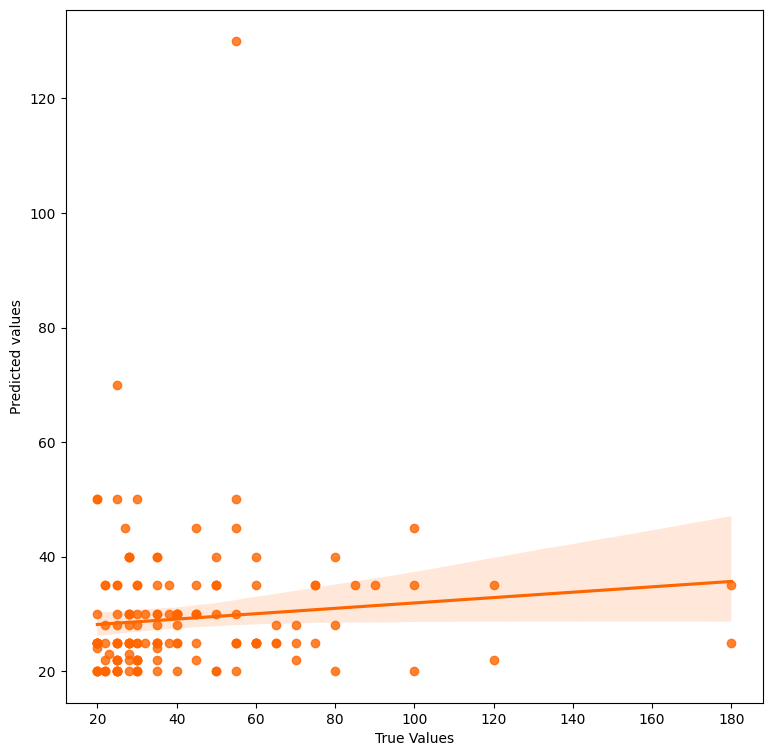

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.figure(figsize=(9,9))
sns.regplot(x = y_test,y = y_pred, color='#FF6600')
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.show()